#  Implementing Decision Tree Classifier on Adult Data Set

In [131]:
"""
Muhammad Awais Ali - i161047
Asim Ikram - i161022
"""

'\nMuhammad Awais Ali - i161047\nAsim Ikram - i161022\n'

## The data set is being used for the classification purposes.This is basically a census dataset used to predict whether the income of a person is greater than or less than equal to 50K.

##### In this assignment our purpose is to fully understang the data set via means of statistical analysis .

### Necessary Imports

In [24]:
%pylab inline
import numpy as np
import pandas as pd
import scipy.stats
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
from collections import defaultdict
from collections import Counter
import math as math
from __future__ import division

np.set_printoptions(threshold=np.nan)

Populating the interactive namespace from numpy and matplotlib


# Reading the Data

In [75]:
data=pd.read_csv('./dataset/adult.data')
data.columns = ["Age", "Workclass", "fnlwgt", "Education", "Education-num", "Marital-Status", "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss", "Hours-per-Week", "Native-Country", "Label"]

print ("The Adult dataset consists of" ,data.shape[0], "rows and" ,data.shape[1], "no of features. " )
data.head()

The Adult dataset consists of 32560 rows and 15 no of features. 


,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-Week,Native-Country,Label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [76]:
#getting the data in to the matrix
X=np.array(data[["Age", "Workclass", "fnlwgt", "Education", "Education-num", "Marital-Status", "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss", "Hours-per-Week", "Native-Country"]].dropna())

Y=np.array(data["Label"].dropna())
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape   )

print(Y.shape)


 Data Set Dimensions= (32560, 14)  True Class labels dimensions (32560,)
(32560,)


# Handling Missing Values
**Since the data contained noisy values, we had to remove them**

In [77]:
#by using the masked of indices rows having noise are removed from the data set
count=0
masked_index=[]
for i in range(len(X)):
    if((X[i,::]==' ?').any()):
        count+=1
        masked_index.append(i)
        #print ("row",i)
        #print(X[i],Y[i])
       
print ("length of masked=",len(masked_index))
print("number of examples having noise:",count)
X=np.delete(X,masked_index,axis=0)
Y=np.delete(Y,masked_index,axis=0)
print (X.shape,Y.shape)



length of masked= 2399
number of examples having noise: 2399
(30161, 14) (30161,)


# Describing the Data

**Graphs fnlwgt,capital gain, capital loss, hours per week, and native country are not shown since they have too many points to plot**

In [78]:
class Describe_Data:
    
    def _init_(self):
        pass
    
    def Describe_Categorical(self, data):
        categorical = data.loc[:,['Workclass', 'Education', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country']]
        categorical_data = np.array(categorical.describe().copy())
        unique = categorical_data[1,:].flatten()        
        frequency = categorical_data[3,:].flatten()
        
        #fig, ax = plt.subplots()
        xrange = np.arange(8)
        x_labels = ['Private', 'HS-Grad', 'Married-civ-spouse', 'Prof-Speciality', 'Husband', 'White', 'Male', 'United States']
        plt.figure(figsize=(15,5))
        bars = plt.bar(xrange, frequency, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency")
        plt.xlabel("\nFeature")
        plt.title("Frequency of Top Element")
        
        #fig, ax = plt.subplots()
        xrange = np.arange(8)
        x_labels = ['Workclass', 'Education', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country']
        plt.figure(figsize=(15,5))
        bars = plt.bar(xrange, unique, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Unique Elements")
        plt.xlabel("\nFeature")
        plt.title("Number of Unique Elements in Feature")
        
        plt.show()
        
    
    def Describe_Continuous(self, data):
        continuous = data.loc[:,['Age', 'fnlwgt' ,'Education-num', 'Capital-Gain', 'Capital-Loss', 'Hours-per-Week']] 
        #continuous.describe()
        continuous_data = np.array(continuous.describe().copy())
        mean = continuous_data[1,:]
        std = continuous_data[2,:]
        minimum = continuous_data[3,:]
        percentile_25 = continuous_data[4,:]
        median = continuous_data[5,:]
        percentile_75 = continuous_data[6,:]
        maximum = continuous_data[7,:]
        
        xrange = np.arange(6)
        x_labels = ['Age', 'fnlwgt', 'Education Num', 'Capital-Gain', 'Capital-Loss', 'Hours-per-Week']
        plt.figure(figsize=(8,5))
        bars = plt.bar(xrange, mean, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Mean")
        plt.xlabel("\nFeature")
        plt.title("Mean")
        
        plt.show()
    
        plt.figure(figsize=(8,5))
        bars = plt.bar(xrange, minimum, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Minimum")
        plt.xlabel("\nFeature")
        plt.title("Minimum")
        
        plt.show()
        
        plt.figure(figsize=(8,5))
        bars = plt.bar(xrange, percentile_25, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("25th Percentile")
        plt.xlabel("\nFeature")
        plt.title("25th Percentile")
        
        plt.show()
        
        plt.figure(figsize=(8,5))
        bars = plt.bar(xrange, median, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Median")
        plt.xlabel("\nFeature")
        plt.title("Median")
        
        plt.show()
        
        plt.figure(figsize=(8,5))
        bars = plt.bar(xrange, percentile_75, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("75th Percentile")
        plt.xlabel("\nFeature")
        plt.title("75th Percentile")
        
        plt.show()
        
        plt.figure(figsize=(8,5))
        bars = plt.bar(xrange, maximum, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Maximum")
        plt.xlabel("\nFeature")
        plt.title("Maximum")
        
        plt.show()
        
    
    
    def Describe_Age(self, data):
        age = np.array(data)
        age = age[:,0]
        
        unique,counts = np.unique(age, return_counts=True)
        total = len(age)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(20,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nAge")
        plt.title("Feature Frequency")
        
        plt.show()
        
    
    def Describe_Workclass(self, data):

        workclass = np.array(data)
        workclass = workclass[:,1]
        
        unique,counts = np.unique(workclass, return_counts=True)
        total = len(workclass)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(12,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nWorkclass")
        plt.title("Feature Frequency")
        
        plt.show()
        
    def Describe_fnlwgt(self, data):
        fnlwgt = np.array(data)
        fnlwgt = fnlwgt[:,2]
        
        unique,counts = np.unique(fnlwgt, return_counts=True)
        total = len(fnlwgt)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(15,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nfnlwgt")
        plt.title("Feature Frequency")
        
        plt.show()
        
    def Describe_Education(self, data):
        education = np.array(data)
        education = education[:,3]
        
        unique,counts = np.unique(education, return_counts=True)
        total = len(education)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(20,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nEducation")
        plt.title("Feature Frequency")
        plt.grid( 'off', axis='x' )
        
        plt.show()
        
    
    def Describe_Education_Num(self, data):
        education = np.array(data)
        education = education[:,4]
        
        unique,counts = np.unique(education, return_counts=True)
        total = len(education)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(18,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nEducation Number")
        plt.title("Feature Frequency")
        plt.grid( 'off', axis='x' )
        
        plt.show()
        
    def Describe_Marital_Status(self, data):
        graph = np.array(data)
        graph = graph[:,5]
        
        unique,counts = np.unique(graph, return_counts=True)
        total = len(graph)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(15,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nMartial Status")
        plt.title("Feature Frequency")
        plt.grid( 'off', axis='x' )
        
        plt.show()
        
    def Describe_Occupation(self, data):
        graph = np.array(data)
        graph = graph[:,6]
        
        unique,counts = np.unique(graph, return_counts=True)
        total = len(graph)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(25,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nOccupation")
        plt.title("Feature Frequency")
        plt.grid( 'off', axis='x' )
        
        plt.show()
        
    def Describe_Relationship(self, data):
        graph = np.array(data)
        graph = graph[:,7]
        
        unique,counts = np.unique(graph, return_counts=True)
        total = len(graph)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(12,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nRelationship")
        plt.title("Feature Frequency")
        plt.grid( 'off', axis='x' )
        
        plt.show()
        
    def Describe_Race(self, data):
        graph = np.array(data)
        graph = graph[:,8]
        
        unique,counts = np.unique(graph, return_counts=True)
        total = len(graph)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(10,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nRace")
        plt.title("Feature Frequency")
        plt.grid( 'off', axis='x' )
        
        plt.show()
        
    def Describe_Sex(self, data):
        graph = np.array(data)
        graph = graph[:,9]
        
        unique,counts = np.unique(graph, return_counts=True)
        total = len(graph)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        #plt.figure(figsize=(10,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nSex")
        plt.title("Feature Frequency")
        plt.grid( 'off', axis='x' )
        
        plt.show()
        
    def Describe_Capital_Gain(self, data):
        graph = np.array(data)
        graph = graph[:,10]
        
        unique,counts = np.unique(graph, return_counts=True)
        total = len(graph)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(25,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nCapital Gain")
        plt.title("Feature Frequency")
        plt.grid( 'off', axis='x' )
        
        plt.show()
        
    def Describe_Capital_Loss(self, data):
        graph = np.array(data)
        graph = graph[:,11]
        
        unique,counts = np.unique(graph, return_counts=True)
        total = len(graph)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(25,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nRace")
        plt.title("Feature Frequency")
        plt.grid( 'off', axis='x' )
        
        plt.show()
        
    def Describe_Hours(self, data):
        graph = np.array(data)
        graph = graph[:,12]
        
        unique,counts = np.unique(graph, return_counts=True)
        total = len(graph)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(25,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nHours Per Week")
        plt.title("Feature Frequency")
        plt.grid( 'off', axis='x' )
        
        plt.show()
        
    def Describe_Native_Country(self, data):
        graph = np.array(data)
        graph = graph[:,13]
        
        unique,counts = np.unique(graph, return_counts=True)
        total = len(graph)
        
        frequency = []
        
        for i in counts:
            freq = (i/total)*100
            frequency.append(freq)
            
        #print(frequency)
        #fig, ax = plt.subplots()
        xrange = np.arange(len(unique))
        x_labels = [x for x in unique]
        frequency1 = [f for f in frequency]
        plt.figure(figsize=(45,5))
        bars = plt.bar(xrange, frequency1, align='center', width=0.5)
        plt.xticks(xrange, x_labels)
        plt.ylabel("Frequency (%)")
        plt.xlabel("\nNative Country")
        plt.title("Feature Frequency")
        plt.grid( 'off', axis='x' )
        
        plt.show()
        


**Native country has a lot more unique values than the other features**

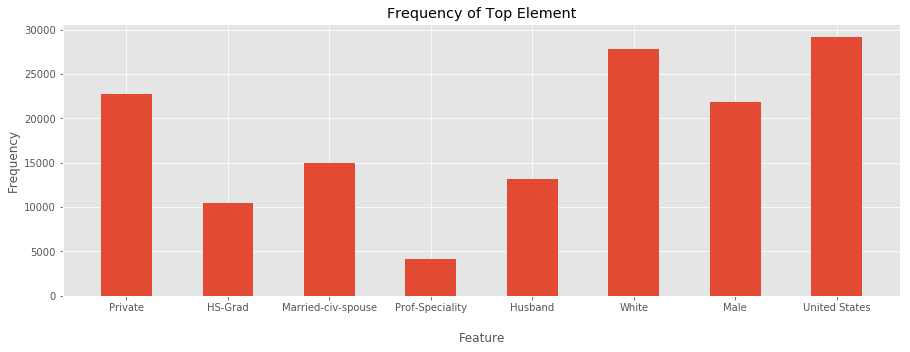

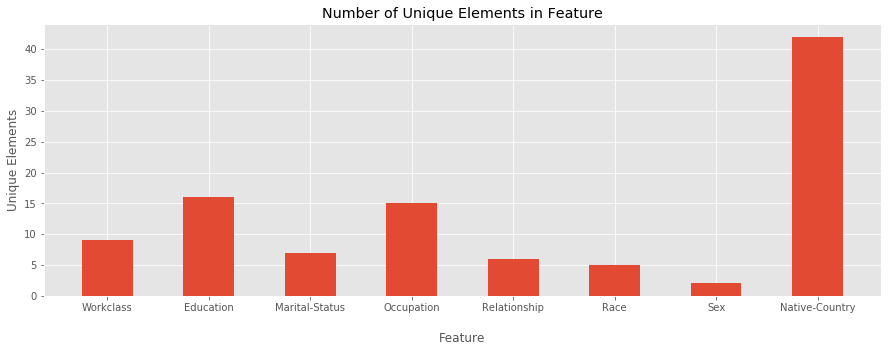

In [79]:
describe = Describe_Data()
describe.Describe_Categorical(data)

**fnlwgt makes the data imbalanced**

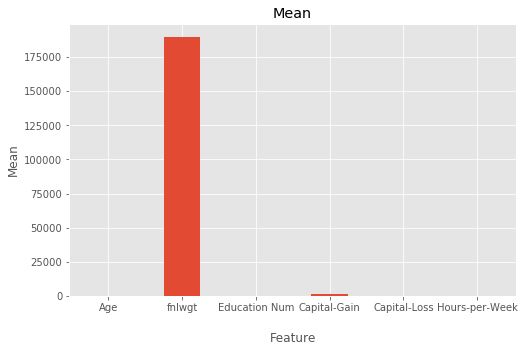

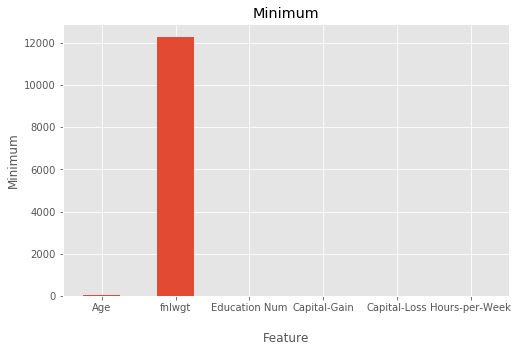

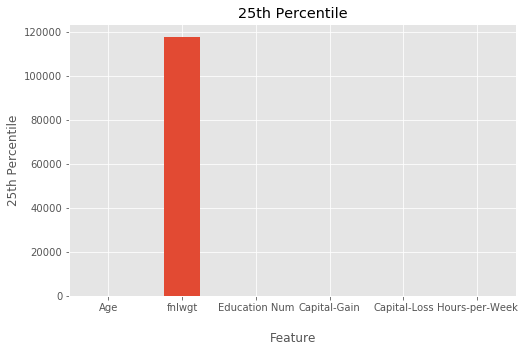

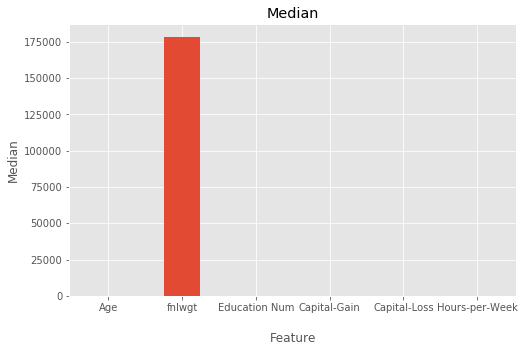

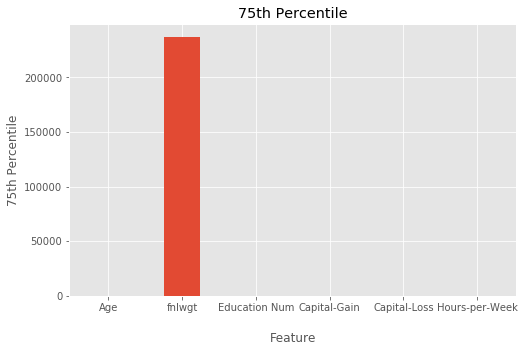

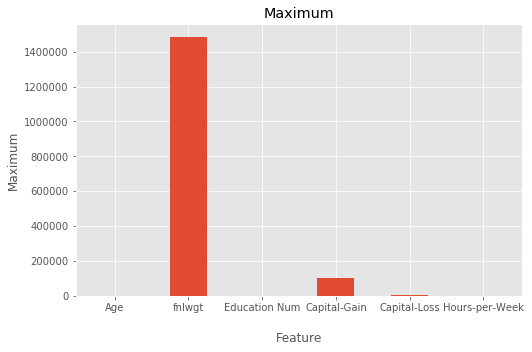

In [80]:
describe.Describe_Continuous(data)

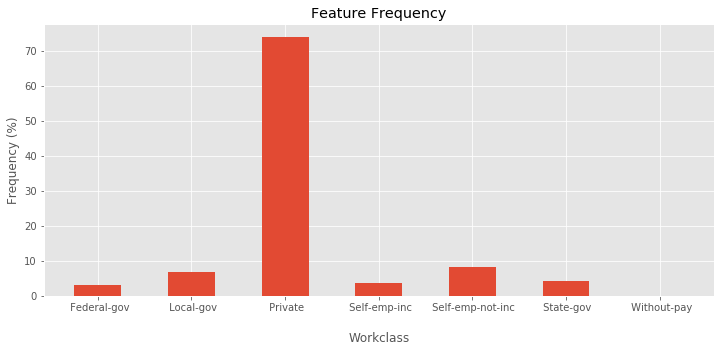

In [81]:
describe.Describe_Workclass(X)

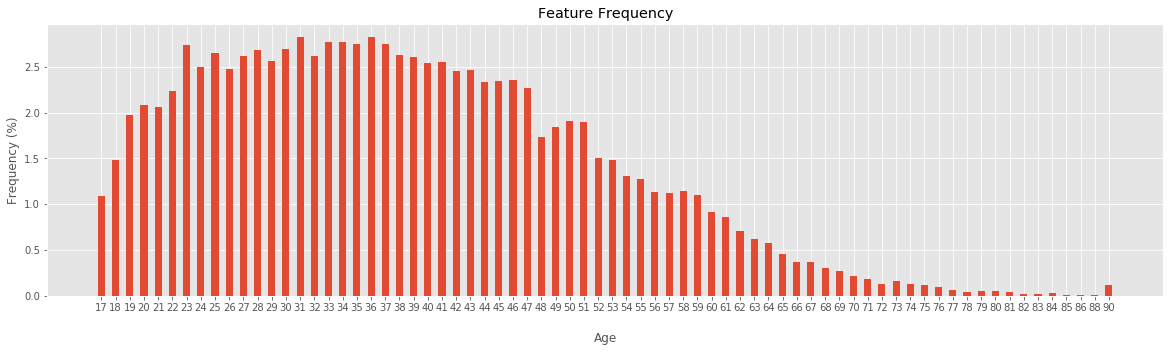

In [82]:
describe.Describe_Age(X)

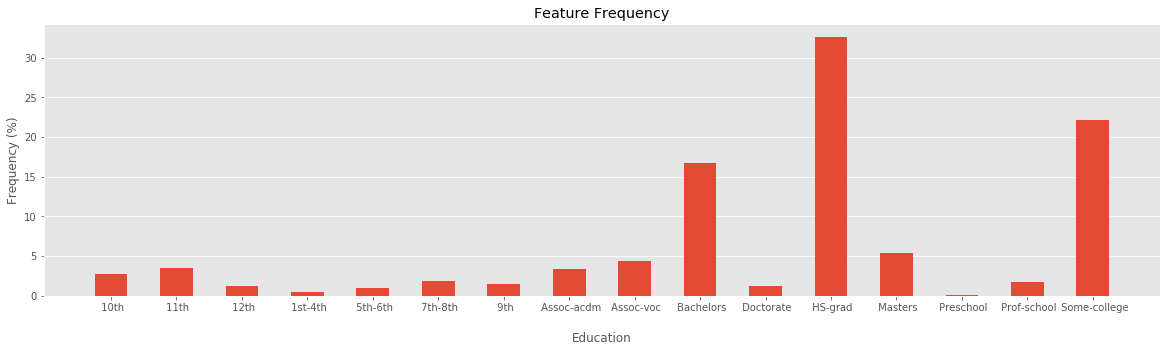

In [83]:
describe.Describe_Education(X)

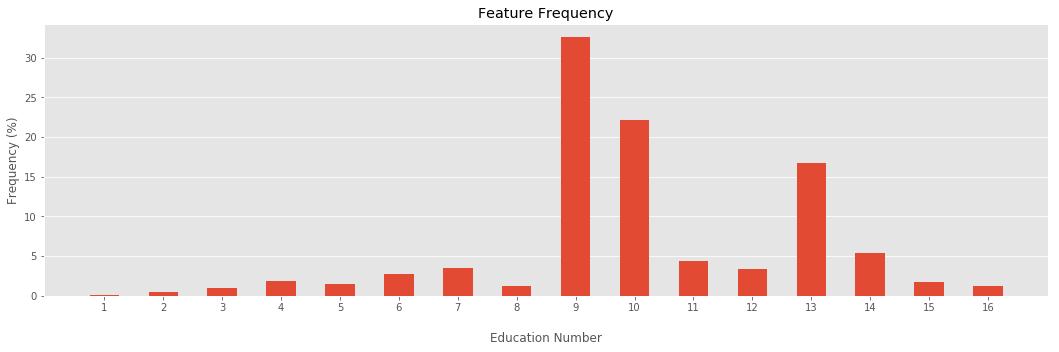

In [84]:
describe.Describe_Education_Num(X)

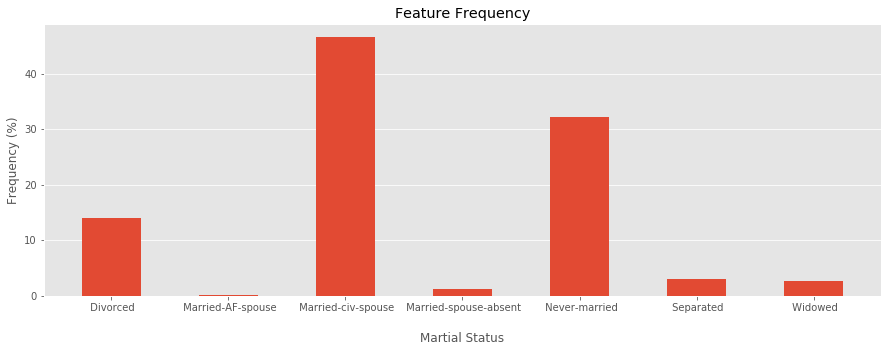

In [85]:
describe.Describe_Marital_Status(X)

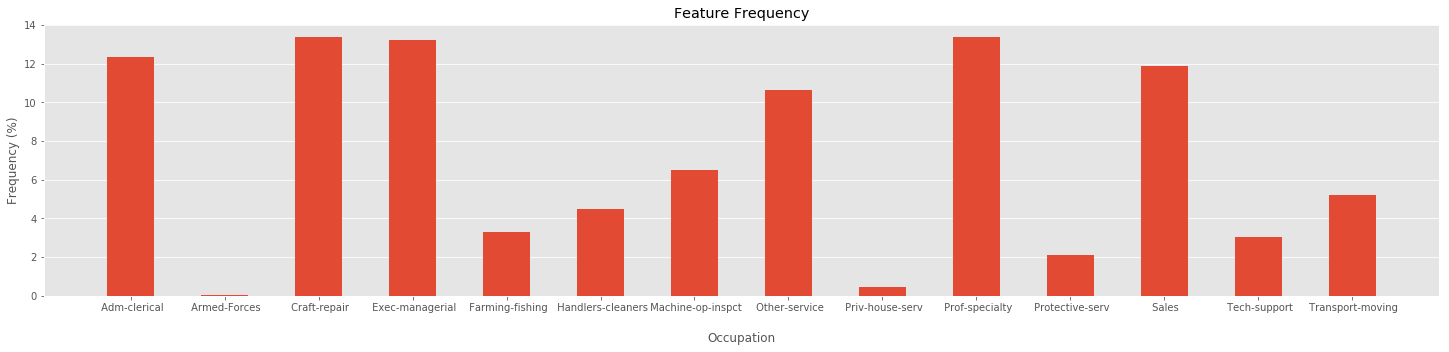

In [86]:
describe.Describe_Occupation(X)

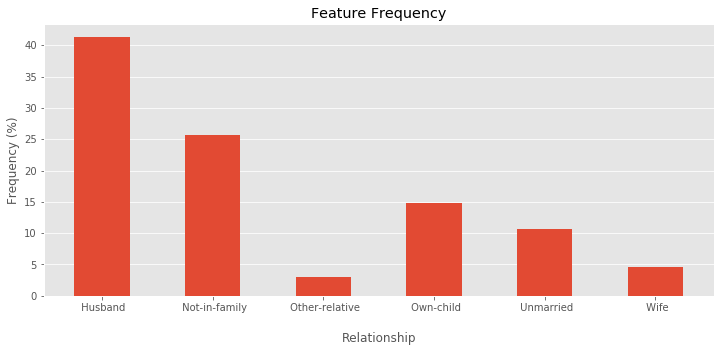

In [87]:
describe.Describe_Relationship(X)

**White race has a lot more values than other features**

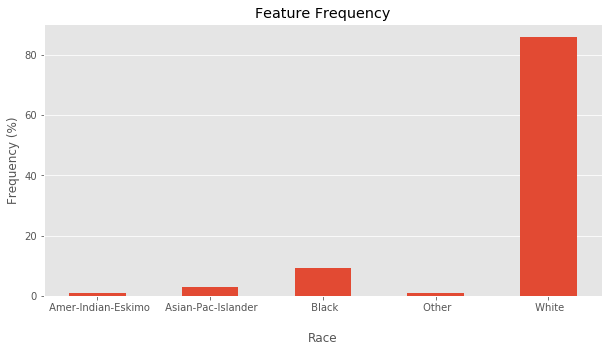

In [88]:
describe.Describe_Race(X)

**Males are double the amount of females**

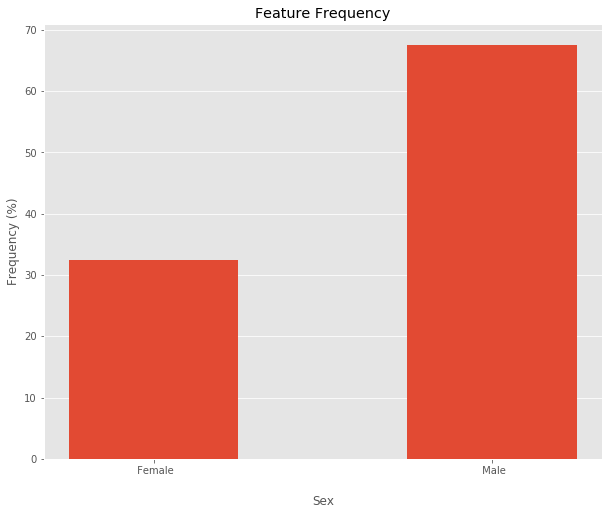

In [89]:
describe.Describe_Sex(X)

# Changing Class Label to Binary Values

In [90]:


print(np.unique(Y))
pd.isnull(np.where(Y))

#converting <=50k to 0 and >50k to 1
Y[Y ==' <=50K']=0
Y[Y ==' >50K']=1


[' <=50K' ' >50K']


In [91]:
positive_class=np.count_nonzero(Y)
negative_class=np.size(Y)-positive_class
print ("Label class consists of ",positive_class," belonging to >50 and ",negative_class,"examples belonging to <=50 out of ",np.size(Y )," total examples")

Label class consists of  7508  belonging to >50 and  22653 examples belonging to <=50 out of  30161  total examples


# Splitting the Data

In [92]:



#splitting data into tranning and testing test
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)#shuffle default true

print (" Training Data Set Dimensions=", Xtrain.shape,"Training True Class labels dimensions", Ytrain.shape)   
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytest.shape)  
#print(X.shape)




 Training Data Set Dimensions= (24128, 14) Training True Class labels dimensions (24128,)
 Test Data Set Dimensions= (6033, 14) Test True Class labels dimensions (6033,)


# The Decision Tree Class
**The decision tree has been implemented using nested dictionaries <br>
Entropies for both categorical and continuous attributes have been calculated <br>
K-fold cross validation has been performed for K = 4 and K = 7**

In [93]:
from collections import defaultdict
import pdb;

class decision_tree:
    tree = defaultdict(dict)
        
    
    def __init__(self,X,Y):
        
        
        pass
    
#     def print_attribute_indexes(self):
        
#         print("X has following indexes: ",self.attribute_indexes)
        
    def train(self,X,Y):
        
        attribute_indexes=[]
        attribute_indexes=np.arange(X.shape[1])
        self.tree=self.build_tree(X,Y,attribute_indexes)   
        #print("final tree:",self.tree)
        
        
    def Entropy_categorical(self,X,Y):#will calculate entropy of every feature seperately
        X_unique=np.unique(X)
        Y_unique=np.unique(Y)


        Entropy_feature=0 #entropy of the whole feature

        for i in X_unique: #entropy(X|y=element in unique)
            total_records=0
            records=[]
            entropy_Sv=None
            for k in Y_unique:#checking every unique value agianst xunique
                total_records=np.sum(X==i)

                masked_X=(X[:]==i)
                indices_i=np.where(masked_X)#indices for where X==i

                records_no=np.sum(Y[indices_i]==k)
                records.append(records_no)




             #   print (i, " total_records=",total_records," records with class=",k,"=" ,records_no)

            #print (records,total_records)  
            Entropy_sum_sv=0
            for i in records:
                if(i!=0):
                    Entropy_sum_sv+=(i/total_records)*(math.log(i/total_records,2))
                else:
                    Entropy_sum_sv+=0
            Entropy_sum_sv=-1*Entropy_sum_sv        
            #print ("Entropy_sum_sv=",Entropy_sum_sv)        
            #now multiplying entropy_sum_sv with sv/s
            Entropy_feature+=total_records/X.size*Entropy_sum_sv
            #print ("Entropy_feature=",Entropy_feature) 
        return Entropy_feature       
    
    

    def Entropy_numerical(self,X,Y):#will calculate entropy of every continuous feature seperately
        #will return a dictionary of split points as keys with their entropies as values
        #print(X)
        #print(X.shape,Y.shape)
        Y_unique=np.unique(Y)
        X=X.reshape(X.size,1)
        Y=Y.reshape(Y.size,1)
        Concat_XY=np.concatenate((X,Y),axis=1)

        #print(X.shape,Y.shape)

        #print(Concat_XY[Concat_XY[:,0].argsort()])
        Concat_XY=Concat_XY[Concat_XY[:,0].argsort()]
        #print(Concat_XY)
        #now finding all the split points
        bins=defaultdict(dict)
        for i in range(len(Concat_XY)-1):
            if((Concat_XY[i,1] != Concat_XY[i+1,1])):
                dic={Concat_XY[i,0]:None}
                bins.update(dic)

        #print (bins)    

        for key in bins.keys():#For calculating entropy against every split point
            masked_X_greaterthan=(Concat_XY[:,0]>key)#examples greater than key
            Count_X_greaterthan=Counter(masked_X_greaterthan)
            masked_X_lessthanequalto=(Concat_XY[:,0]<=key)#examples less than equal to key
            Count_X_lessthan=Counter(masked_X_lessthanequalto)
            indices_data_greater_than_key=np.where(masked_X_greaterthan)
            indices_data_less_thanequalto_key=np.where(masked_X_lessthanequalto)
            data_greater_than_key=Concat_XY[indices_data_greater_than_key].copy()
            data_less_thanequalto_key=Concat_XY[indices_data_less_thanequalto_key].copy()

            Entropy_split=0
            Entropy_sv=[]
            Total_records=[]
            for i in range(2):

                if (i==0):#for data less than split
                    total_records=None
                    records=[]
                    #entropy_less_than=None
                    for k in Y_unique:
                        total_records=Counter(masked_X_lessthanequalto)#total number of examples in one half
                        masked_k=(data_less_thanequalto_key[:,1]==k)# with records having k class
                        #print(masked_k)
                        count=Counter(masked_k)
                        records.append(count[True])
                        #print(count)
                        #print ("key:",key,"less than", " total_records=",total_records[True]," records with class=",k,"=" ,count[True])
                    Entropy_sum_sv=0
                    for m in records:
                        if(m!=0):
                            Entropy_sum_sv+=(m/total_records[True])*(math.log2(m/total_records[True]))
                        else:
                            Entropy_sum_sv+=0
                    Entropy_sum_sv=-1*Entropy_sum_sv        
                    #print ("Entropy_sum_sv_lessthan=",Entropy_sum_sv)
                    Entropy_sv.append(Entropy_sum_sv)
                    Total_records.append(total_records[True])



                if (i==1):#for data greater than split
                    total_records=None
                    records=[]
                    #entropy_less_than=None
                    for k in Y_unique:
                        total_records=Counter(masked_X_greaterthan)#total number of examples in one half
                        masked_k=(data_greater_than_key[:,1]==k)# with records having k class
                        #print(masked_k)
                        count=Counter(masked_k)
                        records.append(count[True])
                        #print(count)
                        #print ("key:",key,"greater than", " total_records=",total_records[True]," records with class=",k,"=" ,count[True])
                    Entropy_sum_sv=0
                    for m in records:
                        if(m!=0):
                            Entropy_sum_sv+=(m/total_records[True])*(math.log2(m/total_records[True]))
                        else:
                            Entropy_sum_sv+=0
                    Entropy_sum_sv=-1*Entropy_sum_sv        
                    #print ("Entropy_sum_sv_greaterthan=",Entropy_sum_sv)
                    Entropy_sv.append(Entropy_sum_sv)
                    Total_records.append(total_records[True])


            #print("Entropy_sv:",Entropy_sv)  

            #now multiplying entropy_sum_sv with sv/s
            for e,r in zip(Entropy_sv,Total_records):
                #print("final",e,r)
                Entropy_split+=(r/Concat_XY.size)*e
                #print("entropysplit=",Entropy_split)

            bins[key]=Entropy_split







        #print (bins.values())
        min_value = min(bins.values())
        split = [key for key, value in bins.items() if value == min_value]
        #return [split,bins[split[0]]]
        return split,bins.get(split[0])    



        
    def get_best_attribute(self,X,Y,attr_idx):

        
        #X=X.reshape(X.size,1)
        #print("Xhas following shape",X.shape)
        if(len(attr_idx)>0):
            nexamples,nfeatures=X.shape

            Entropies_cont={}
            Entropies_discrete={}

            for i in range(nfeatures):
                #check for continuous and discrete feature

                if(i in attr_idx[:]):
                    if(isinstance(X[0,i],(str))==True):

                        Entropies_discrete.update({i:self.Entropy_categorical(X[:,i],Y)})

                    elif(isinstance(X[0,i],(int,float))==True):
                        Entropies_cont.update({i:self.Entropy_numerical(X[:,i],Y)})

            minvalue_discrete,minkey_discrete,minvalue_cont,minkey_cont=None,None,None,None 
             #here key corresponds to feature index in X
            if(bool(Entropies_discrete)!= False ):
                  #  print("A")
                minvalue_discrete,minkey_discrete = min((v,k) for k,v in Entropies_discrete.items())
                 #   print(type(minvalue_discrete),type(minkey_discrete))
            if(bool(Entropies_cont)!= False ):
               

                minvalue_cont,minkey_cont = min((v[1],k) for k,v in Entropies_cont.items())#because list is being returned by the the entropy fucntion
               

            #print("minvalue_discrete,minkey_discrete,minvalue_cont,minkey_cont",minvalue_discrete,minkey_discrete,minvalue_cont,minkey_cont)
            #now check which attribute has min entropy
            if minkey_discrete is not None and minkey_cont is not None and Entropies_cont[minkey_cont][0][0] is not None and minvalue_discrete is not None:
                #print("C")
                #print(type(minvalue_discrete),type(minkey_discrete))
                #print("\n\n 1 ",minvalue_cont)
                #print("\n\n 2 ",minvalue_discrete)
                if minvalue_discrete<=(minvalue_cont):#these are the entropies
                    return minkey_discrete,minvalue_discrete#feature key and entropy
                else:
                    return minkey_cont,Entropies_cont[minkey_cont][0][0]# featurekey and splitpoint  

            elif minkey_discrete is not None and minvalue_discrete is not None:
                #print("D")
                #print(type(minkey_discrete),type(minvalue_discrete))
                return minkey_discrete,minvalue_discrete
            elif minkey_cont is not None and Entropies_cont[minkey_cont][0][0] is not None:
                #print("E")
                #print(type(minkey_cont),type(Entropies_cont[minkey_cont][0][0]))
                return minkey_cont,Entropies_cont[minkey_cont][0][0]# featurekey and splitpoint  


    def build_tree(self,X, Y,attribute_indexes):
        """ 
            Function is used to recursively build the decision Tree 

            Input
            -----
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.

            Returns
            -------
            root node of the built tree...
        """

        
#         if(X.shape[1]<1):
#             print("returning because there are no more features to evalutate")
#             tree.klasslabel=None
#             return tree
        tree=None
        if(((Y==0).all())):
            #print("returning because all examples have same lables 0")
#             tree.klasslabel=0
            return 0
        
        elif((Y==1).all()):
            #print("returning because all examples have same lables 1")
#             tree.klasslabel=1
            return 1
        elif(Y.shape[0] < 1 and X.shape[0] < 1):
            Zeros=0
            ones=0
            for i in range(Y.shape[0]):
                if Y[i] == 0:
                    Zeros += 1
                else:
                    ones += 1
            #ones=Y.count(1)
            if(Zeros>ones):
                return 0
            else:
                return 1
        elif(len(attribute_indexes) < 1):
            Zeros=0
            ones=0
            for i in range(Y.shape[0]):
                if Y[i] == 0:
                    Zeros += 1
                else:
                    ones += 1
            #ones=Y.count(1)
            if(Zeros>ones):
                return 0
            else:
                return 1
            
        else:
            #print(self.tree,"dictionaiony")

            #print (X.shape,Y.shape)
            
            feat_idx,value=self.get_best_attribute(X,Y,attribute_indexes)
            #print("feat_idx,value",feat_idx,value)
            #print("attribute_number_before:",self.attribute_indexes)
            
            tree = {(feat_idx):{}}


            feat_unique=None


            feat_uni_index=[]
            rows_continuous_greaterthan=[]
            rows_continuous_lessthan=[]
            # a check will be maintained for continuous or discrete attribute
            check=None
            if(isinstance(X[0,feat_idx],(str))==True):#for discrete
                    check=0     
                    feat_unique=np.unique(X[:,feat_idx])
                    for i in feat_unique:
                        masked_index=(X[:,feat_idx]==i)
                        feat_uni_index.append(np.where(masked_index))
                    #print("Attribute index is:",feat_idx," ,unique values:",feat_unique)

                    #for k in range(len(feat_unique)):
                     #   print("k=",k," rows:",feat_uni_index[k])

            elif(isinstance(X[0,feat_idx],(int,float))==True):
                    check=1

                    masked_greater=(X[:,feat_idx]>value)
                    rows_continuous_greaterthan=np.where(masked_greater)
                    masked_less=(X[:,feat_idx]<=value)
                    rows_continuous_lessthan=np.where(masked_less)


#                 idexes=(self.attribute_indexes[:]==feat_idx)
#                 masked_index=np.where(idexes)
#                 self.attribute_indexes=np.delete(self.attribute_indexes,masked_index,axis=0)
#                 X=np.delete(X,feat_idx,axis=1)  
            #global my_var
            #pdb.set_trace()
            if(check==0):
                for f in range(len(feat_unique)):
                    #X=np.delete(X,feat_idx,axis=1) 
                    idexes=(attribute_indexes[:]==feat_idx)
                    masked_index=np.where(idexes)
                    attribute_indexes=np.delete(attribute_indexes,masked_index,axis=0)

                    #print("f=",f,"attribute feature name:",feat_unique[f])
                    node=(self.build_tree(X[feat_uni_index[f]],Y[feat_uni_index[f]],attribute_indexes))
                    #if(node is not None):
                    #print("check=0",feat_idx,feat_unique[f])
                    
                    
                    tree[(feat_idx)][feat_unique[f]] = node 

                

            elif(check==1):
                for f in range(2):
                    #print("f=",f,"feature is continuous")

                    if(f==0):#LESSTHAN
                        #X=np.delete(X,feat_idx,axis=1)
                        v_append=str(value)+'L'
                        idexes=(attribute_indexes[:]==feat_idx)
                        masked_index=np.where(idexes)
                        attribute_indexes=np.delete(attribute_indexes,masked_index,axis=0)
                        node=(self.build_tree(X[rows_continuous_lessthan],Y[rows_continuous_lessthan],attribute_indexes))
                        
                        tree[(feat_idx)][str(v_append)] = node



                    elif(f==1):
                        v_append=str(value)+'R'
                        idexes=(attribute_indexes[:]==feat_idx)
                        masked_index=np.where(idexes)
                        attribute_indexes=np.delete(attribute_indexes,masked_index,axis=0)
                        node=(self.build_tree(X[rows_continuous_greaterthan],Y[rows_continuous_greaterthan],attribute_indexes))
                        
                        tree[(feat_idx)][str(v_append)] = node
                
            


        return tree
    
   

### Building the Decision Tree

In [94]:
dt=decision_tree(X,Y)
#dt.print_attribute_indexes()


## Trainning on overall data set

In [96]:
#%pdb ON
#print(X.shape)
tree=dt.train(X,Y)

In [ ]:
print(tree)

## Finally extracting rules from the tree


In [97]:

# for key in dt.tree:
#     print  ("key:",key,"value:", [i for i in dt.tree[key]])

# indexes=[]
# for i in range(Xtrain.shape[1]):
#     indexes.append(str(i)+'f')

# #print(indexes)    

# key=dt.tree.keys()
# if ('0') in dt.tree:
#     print("true")
    
# rules=[]
# #first checking its a feature or a key
# def traverse(d):
#     rule=[]
#     for key in d:
#         print  ("key:",key,"value:", dt.tree[key],"\n")
#         if(isinstance(key,(int))==True):#means dict is nested
#             l=[]
#             rule.append(l)#cretes one col in rule
#             #now append this feature values in to this feature col
#             #this feature can have only these values
            
#         elif(isinstance(key,(str))==True):
#             """if then this key value can be a label or another dict
#             if its a dict then recursively call this function"""
            
            
rule = []
label = []                    
def print_dict(v, prefix=''):

    if isinstance(v, dict):
        for k, v2 in v.items():
            p2 = "{} {}".format(prefix, k)
            #p2 = [prefix,k]
            print_dict(v2, p2)
    elif isinstance(v, list):
        for i, v2 in enumerate(v):
            p2 = "{}{}".format(prefix, i)
            #p2 = [prefix,i]
            print_dict(v2, p2)
    else:
        print('{} = {}'.format((prefix), repr(v)))
        #print(list(prefix))
        #print ((prefix))
        rule.append((prefix))
        #rule.append("@")
        label.append(v)
        
        #touple =(prefix,v)
        #l.append(touple)
        #return l
        #print(rule)

        
print_dict(dt.tree)

#print(rule)

 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Adm-clerical = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Craft-repair = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Exec-managerial = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Farming-fishing = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Handlers-cleaners = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Machine-op-inspct = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  10th = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  11th = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  12th = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  1st-4th = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  7th-8th = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  9th = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  HS-grad = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  Pre

 10 6849L 0 27L 12 35R 11 1762L 4 11L 2 31290R 5  Married-civ-spouse 3  HS-grad 6  Other-service 13  United-States 7  Husband 1  Federal-gov = 0
 10 6849L 0 27L 12 35R 11 1762L 4 11L 2 31290R 5  Married-civ-spouse 3  HS-grad 6  Other-service 13  United-States 7  Husband 1  Private 8  White 9  Male = 0
 10 6849L 0 27L 12 35R 11 1762L 4 11L 2 31290R 5  Married-civ-spouse 3  HS-grad 6  Other-service 13  United-States 7  Husband 1  Self-emp-not-inc = 1
 10 6849L 0 27L 12 35R 11 1762L 4 11L 2 31290R 5  Married-civ-spouse 3  HS-grad 6  Other-service 13  United-States 7  Own-child = 0
 10 6849L 0 27L 12 35R 11 1762L 4 11L 2 31290R 5  Married-civ-spouse 3  HS-grad 6  Other-service 13  United-States 7  Wife 1  Private = 1
 10 6849L 0 27L 12 35R 11 1762L 4 11L 2 31290R 5  Married-civ-spouse 3  HS-grad 6  Other-service 13  United-States 7  Wife 1  Self-emp-not-inc = 0
 10 6849L 0 27L 12 35R 11 1762L 4 11L 2 31290R 5  Married-civ-spouse 3  HS-grad 6  Priv-house-serv = 0
 10 6849L 0 27L 12 35R 11 1

 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Not-in-family 6  Prof-specialty 9  Male 13  United-States 3  Assoc-voc 5  Married-spouse-absent = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Not-in-family 6  Prof-specialty 9  Male 13  United-States 3  Assoc-voc 5  Never-married = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Not-in-family 6  Prof-specialty 9  Male 13  United-States 3  Assoc-voc 5  Separated = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Not-in-family 6  Prof-specialty 9  Male 13  United-States 3  HS-grad 5  Divorced = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Not-in-family 6  Prof-specialty 9  Male 13  United-States 3  HS-grad 5  Married-spouse-absent = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Not-in-family 6  Prof-specialty 9  Male 13  United-States 3  HS-grad 5  Never-married 1  Private 8  White = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Not-in-family 6  Prof-specialty 9  Male 13  United-States 3  HS-grad 5

 10 6849L 0 27R 4 12L 11 1816L 12 41R 2 73621R 5  Married-civ-spouse 6  Transport-moving 3  11th 1  Self-emp-not-inc = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41R 2 73621R 5  Married-civ-spouse 6  Transport-moving 3  12th = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41R 2 73621R 5  Married-civ-spouse 6  Transport-moving 3  1st-4th = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41R 2 73621R 5  Married-civ-spouse 6  Transport-moving 3  5th-6th 1  Private = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41R 2 73621R 5  Married-civ-spouse 6  Transport-moving 3  5th-6th 1  Self-emp-inc = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41R 2 73621R 5  Married-civ-spouse 6  Transport-moving 3  5th-6th 1  Self-emp-not-inc = 1
 10 6849L 0 27R 4 12L 11 1816L 12 41R 2 73621R 5  Married-civ-spouse 6  Transport-moving 3  7th-8th 13  Canada = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41R 2 73621R 5  Married-civ-spouse 6  Transport-moving 3  7th-8th 13  Mexico = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41R 2 73621R 5  Married-civ-spouse 6  Transport-mov

 10 6849L 0 27R 4 12R 11 1876L 12 43R 2 90693R 7  Not-in-family 6  Exec-managerial 1  State-gov 3  Bachelors = 0
 10 6849L 0 27R 4 12R 11 1876L 12 43R 2 90693R 7  Not-in-family 6  Exec-managerial 1  State-gov 3  Doctorate = 1
 10 6849L 0 27R 4 12R 11 1876L 12 43R 2 90693R 7  Not-in-family 6  Exec-managerial 1  State-gov 3  Masters = 0
 10 6849L 0 27R 4 12R 11 1876L 12 43R 2 90693R 7  Not-in-family 6  Farming-fishing = 0
 10 6849L 0 27R 4 12R 11 1876L 12 43R 2 90693R 7  Not-in-family 6  Handlers-cleaners 5  Divorced = 1
 10 6849L 0 27R 4 12R 11 1876L 12 43R 2 90693R 7  Not-in-family 6  Handlers-cleaners 5  Never-married = 0
 10 6849L 0 27R 4 12R 11 1876L 12 43R 2 90693R 7  Not-in-family 6  Other-service 1  Private 13  Mexico = 1
 10 6849L 0 27R 4 12R 11 1876L 12 43R 2 90693R 7  Not-in-family 6  Other-service 1  Private 13  United-States = 0
 10 6849L 0 27R 4 12R 11 1876L 12 43R 2 90693R 7  Not-in-family 6  Other-service 1  Self-emp-inc = 1
 10 6849L 0 27R 4 12R 11 1876L 12 43R 2 90693R 

In [12]:
# str_rules = []
# count = 0
# var = 0
# for i in range(len(rule)):
#     if rule[i] == "@":
#         count += 1
#         if count == 1:
#             str_rules.append(rule[0:i])
#             var = i
#         else:
#             j = i
#             str_rules.append(rule[var+1:i])
#             var = i
#         #rule.remove(rule[0:i+1])
        
# print(str_rules)

# print (label[0])

### Now performing k fold cross validation

In [21]:
kfolds=[4,8,10]
kfold_accuracy=[]
rule = []
label = []


def print_dict(v, prefix=''):

    if isinstance(v, dict):
        for k, v2 in v.items():
            p2 = "{} {}".format(prefix, k)
            #p2 = [prefix,k]
            print_dict(v2, p2)
    elif isinstance(v, list):
        for i, v2 in enumerate(v):
            p2 = "{}{}".format(prefix, i)
            #p2 = [prefix,i]
            print_dict(v2, p2)
    else:
        #print('{} = {}'.format((prefix), repr(v)))
        #print(list(prefix))
        #print ((prefix))
        rule.append((prefix))
        #rule.append("@")
        label.append(v)
        
        #touple =(prefix,v)
        #l.append(touple)
        #return l
        #print(rule)

        



def tokenizer(rules):
    tokenized_rules=[]
    for p in range(len(rule)):
            #for k in range(len(rule[p])):
        tokenized_rules.append(rule[p].split())
    #print((tokenized_rules[0][0]))
    return  tokenized_rules

    
    
    

def predict(tokenized_rules,Xtest,Ytest):

    



    final_result=[]

    for example in Xtest:  #example iterator
        #pdb.set_trace()
        example_results_of_all_the_rules=[]    
        for k in range(len(tokenized_rules)):#every rule iterator
            for i in range(len(tokenized_rules[k])):#inside rule iterator
                if(i%2==0):#means its a feature index
                    index=int(tokenized_rules[k][i])

                    #get the value on this index from the test test
                    if(isinstance(example[index],(int,float))==True):
                        #no get the the value of the feature from the tokenized rules array
                        #i+=1
                        #pdb.set_trace()
                        if(tokenized_rules[k][i+1].find("L")!=-1):#for less than
                            rule=tokenized_rules[k][i+1]
                            rule=rule.replace("L","")
                            rule=int(rule)
                            if(example[index]<=rule):
                                continue #will go to the next index in the rule
                            else:
                                break #will go to the next rule in the tokenized rules

                        elif(tokenized_rules[k][i+1].find("R")!=-1):#for greater than
                            rule=tokenized_rules[k][i+1]
                            rule=rule.replace("R","")
                            rule=int(rule)
                            if(example[index]>=rule):
                                continue #will go to the next index in the rule
                            else:
                                break #will go to the next rule in the tokenized rules


                    elif(isinstance(example[index],(str))==True):
                        rule=example[index]
                        rule=rule.strip()
                        if(tokenized_rules[k][i+1]==rule):#for less than
                            continue #will go to the next index in the rule
                        else:
                            break #will go to the next rule in the tokenized rules
            if(i==len(tokenized_rules[k])-1):        
                example_results_of_all_the_rules.append(label[k])     
        #now getting the maximum label that classify this example more times in (example_result_of_all_the_rules)
        #final_result.append(max(example_results_of_all_the_rules))
        example_results_of_all_the_rules=np.array(example_results_of_all_the_rules)
        values,count=np.unique(example_results_of_all_the_rules,return_counts=True)
        #print(values,count)
        if(len(values)==0):
            values=np.append(values,0)
        if(len(values)==2):
            values=np.append(values,1)
        final_result.append(values[0].tolist())

    #print(final_result)
    return final_result




                

    
    
    

def generate_folds(X, Y, nfolds=4):
    """
    Split the training data into startified-nfolds... 

    Parameters:
    --------
    X: training examples
    Y: training labels
    nfolds: number of folds...
        By default split according to fix 75-25% ratio

    Returns:
    ---------
    list of lists, with each nested list containing four elements
    training data, training labels, test data, test labels per fold
    """
    classes = np.unique(Y)
    print ('Generating CV data for {} classes'.format(len(classes)))

    cvlist = []  # four elements per nested-list
    # idxlist=[] # 2 elements per list to contain indeces...

    for cidx, c in enumerate(classes):
        idx = Y == c  # find class example indeces
        Yt = Y[idx]  # get class labels
        Xt = X[idx, :]  # get training examples
        nexamples = Xt.shape[0]
        # Generate a random permutation of the indeces
        ridx = np.arange(nexamples)  # generate indeces
        np.random.shuffle(ridx)  # shuffle randomly ...

        # number of test examples per fold
        nexamples = nexamples / nfolds
        sridx = set(ridx)  # create a set of all indeces
        sidx = 0
        for k in range(nfolds):
            testidx = ridx[sidx:sidx + nexamples]
            trainidx = list(sridx.difference(testidx)) # take a set difference
            sidx += nexamples

            if cidx == 0:
                cvlist.append([Xt[trainidx, :], Yt[trainidx], Xt[testidx, :], Yt[testidx]])
                #idxlist.append([trainidx, testidx])
    #                 cvlist[k][0]=Xt[trainidx,:]
    #                 cvlist[k][1]=Yt[trainidx]
    #                 cvlist[k][2]=Xt[testidx,:]
    #                 cvlist[k][3]=Yt[testidx]
            else:  # append to the set...
                # pdb.set_trace()
                cvlist[k][0] = np.vstack((cvlist[k][0], Xt[trainidx, :]))
                cvlist[k][1] = np.hstack((cvlist[k][1], Yt[trainidx]))
                cvlist[k][2] = np.vstack((cvlist[k][2], Xt[testidx, :]))
                cvlist[k][3] = np.hstack((cvlist[k][3], Yt[testidx]))

                #idxlist[k][0]=np.hstack((idxlist[k][0],trainidx))
                #idxlist[k][1]=np.hstack((idxlist[k][1],testidx))
            # print cidx, k, cvlist[k][0].shape, cvlist[k][2].shape
    return cvlist

nfolds=4 # lets use four folds..
folds=generate_folds(X,Y,nfolds)
features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]#[0, 1, 2, 3] # features to use for our system
#now lets train and test on these folds...
totacc=[]
for k in range(nfolds):
    dt=decision_tree(X,Y)
    tree=dt.train(folds[k][0][:,features],folds[k][1])
    print_dict(dt.tree)
    tokenized_rules=tokenizer(rule)
    final_result=predict(tokenized_rules,folds[k][2][:,features],folds[k][3])
    
    acc=np.sum(final_result==folds[k][3])/float(folds[k][3].shape[0])
    
    print( "[Info] Fold {} Accuracy = {}".format(k+1, acc))
    totacc.append(acc)

print (totacc, '\n Mean Accuracy =', np.mean(totacc)    )
    
    
# for folds in kfolds:
#     avg_accuracy=[]
#     for j in range(folds):
#         Xtrain,Xvalidate,Ytrain,Yvalidate=train_test_split(X,Y,test_size=0.2)
#         dt=decision_tree(Xtrain,Ytrain)
#         tree=dt.train(Xtrain,Ytrain)
#         print_dict(dt.tree)
#         tokenized_rules=tokenizer(rule)
#         final_result=predict(tokenized_rules,Xvalidate,Yvalidate)
#         final_result=np.array(final_result)
#         accuracy=np.sum(final_result==Yvalidate)/len(Yvalidate)
#         print("accuracy on kfolds=",folds," when k=",j," ",accuracy)
#         avg_accuracy.append(accuracy)
#     sum_acc=0
#     average_accuracy=0
#     for i in avg_accuracy:
#         sum_acc+=i
#     average_accuracy=sum_acc/len(avg_accuracy)
#     print("Avg-accuracy on kfolds=",folds," ",average_accuracy)   
#     kfold_accuracy=kfold_accuracy.append(average_accuracy)
    
                    
# sum_acc=0
# average_accuracy=0
# for i in kfold_accuracy:
#     sum_acc+=i
# average_accuracy=sum_acc/len(kfold_accuracy)
# print("Avg-accuracy on kfolds=[4,8,10] is ",average_accuracy)





                
      



Generating CV data for 2 classes


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[Info] Fold 1 Accuracy = 0.8104774535809018
[Info] Fold 2 Accuracy = 0.8586206896551725
[Info] Fold 3 Accuracy = 0.8661803713527851
[Info] Fold 4 Accuracy = 0.8626176899615435
[0.81047745358090184, 0.85862068965517246, 0.86618037135278514, 0.86261768996154353] 
 Mean Accuracy = 0.849474051138


In [23]:
# kfolds=[4,8,10]
# kfold_accuracy=[]
# rule = []
# label = []
# #after removing Education number column
# Xtrain=Xtrain[:,[0,1,2,3,5,6,7,8,9,10,11,12,13]]#4th removed
# for folds in kfolds:
#     avg_accuracy=[]
#     for j in range(folds):
#         Xtrain,Xvalidate,Ytrain,Yvalidate=train_test_split(X,Y,test_size=0.2)
#         dt=decision_tree(Xtrain,Ytrain)
#         tree=dt.train(Xtrain,Ytrain)
#         print_dict(dt.tree)
#         tokenized_rules=tokenizer(rule)
#         final_result=predict(tokenized_rules,Xvalidate,Yvalidate)
#         final_result=np.array(final_result)
#         accuracy=np.sum(final_result==Yvalidate)/len(Yvalidate)
#         print("accuracy on kfolds=",folds," when k=",j," ",accuracy)
#         avg_accuracy.append(accuracy)
#     sum_acc=0
#     average_accuracy=0
#     for i in avg_accuracy:
#         sum_acc+=i
#     average_accuracy=sum_acc/len(avg_accuracy)
#     print("Avg-accuracy on kfolds=",folds," ",average_accuracy)   
#     kfold_accuracy=kfold_accuracy.append(average_accuracy)

# sum_acc=0
# average_accuracy=0
# for i in kfold_accuracy:
#     sum_acc+=i
# average_accuracy=sum_acc/len(kfold_accuracy)
# print("Avg-accuracy on kfolds=[4,8,10] after removing education number col is ",average_accuracy)   


nfolds=7 # lets use four folds..
folds=generate_folds(X,Y,nfolds)
features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]#[0, 1, 2, 3] # features to use for our system
#now lets train and test on these folds...
totacc=[]
for k in range(nfolds):
    dt=decision_tree(X,Y)
    tree=dt.train(folds[k][0][:,features],folds[k][1])
    print_dict(dt.tree)
    tokenized_rules=tokenizer(rule)
    final_result=predict(tokenized_rules,folds[k][2][:,features],folds[k][3])
    
    acc=np.sum(final_result==folds[k][3])/float(folds[k][3].shape[0])
    
    print( "[Info] Fold {} Accuracy = {}".format(k+1, acc))
    totacc.append(acc)

print (totacc, '\n Mean Accuracy =', np.mean(totacc)    )

Generating CV data for 2 classes


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[Info] Fold 1 Accuracy = 0.8558495821727019
[Info] Fold 2 Accuracy = 0.852866094221397
[Info] Fold 3 Accuracy = 0.8618848653667596
[Info] Fold 4 Accuracy = 0.8568113251334416
[Info] Fold 5 Accuracy = 0.8507428040854225


KeyboardInterrupt: 

# At last validating this model on the test set

In [107]:
data=pd.read_csv('./dataset/adult_test.data')
data.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

print ("The Adult dataset consists of" ,data.shape[0], "rows and" ,data.shape[1], "no of features. " )
data.head()


The Adult dataset consists of 16280 rows and 15 no of features. 


,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [108]:
#getting the data in to the matrix
Xtest=np.array(data[["Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry"]].dropna())

Ytest=np.array(data["Income"].dropna())
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape   )




 Data Set Dimensions= (30161, 14)  True Class labels dimensions (30161,)


In [109]:
#by using the masked of indices rows having noise are removed from the data set
count=0
masked_index=[]
for i in range(len(Xtest)):
    if((Xtest[i,::]==' ?').any()):
        count+=1
        masked_index.append(i)
        #print ("row",i)
        #print(X[i],Y[i])

print ("length of masked=",len(masked_index))
print("number of examples having noise:",count)
Xtest=np.delete(Xtest,masked_index,axis=0)
Ytest=np.delete(Ytest,masked_index,axis=0)
print (Xtest.shape,Ytest.shape)



length of masked= 1221
number of examples having noise: 1221
(15059, 14) (15059,)


In [122]:


print(np.unique(Ytest))
pd.isnull(np.where(Ytest))

#converting <=50k to 0 and >50k to 1
Ytest[Ytest ==' <=50K.']=0
Ytest[Ytest ==' >50K.']=1
print(Ytest[0:10])

[0 1]
[0 1 1 0 1 0 0 1 0 0]


## Testing a model

In [111]:
rule = []
label = []

print_dict(dt.tree)

# 

# 

# 

 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Adm-clerical = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Craft-repair = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Exec-managerial = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Farming-fishing = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Handlers-cleaners = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Machine-op-inspct = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  10th = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  11th = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  12th = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  1st-4th = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  7th-8th = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  9th = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  HS-grad = 0
 10 6849L 0 27L 12 35L 2 168943L 4 10L 11 0L 6  Other-service 3  Pre

 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Husband 6  Craft-repair 3  HS-grad 1  Self-emp-not-inc 13  England = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Husband 6  Craft-repair 3  HS-grad 1  Self-emp-not-inc 13  Italy = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Husband 6  Craft-repair 3  HS-grad 1  Self-emp-not-inc 13  Jamaica = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Husband 6  Craft-repair 3  HS-grad 1  Self-emp-not-inc 13  Mexico = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Husband 6  Craft-repair 3  HS-grad 1  Self-emp-not-inc 13  Peru = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Husband 6  Craft-repair 3  HS-grad 1  Self-emp-not-inc 13  United-States 8  Asian-Pac-Islander = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Husband 6  Craft-repair 3  HS-grad 1  Self-emp-not-inc 13  United-States 8  White 5  Married-civ-spouse 9  Male = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832L 7  Husband 6  Craft-repair 3  H

 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832R 7  Husband 3  11th = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832R 7  Husband 3  12th = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832R 7  Husband 3  1st-4th = 1
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832R 7  Husband 3  5th-6th = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832R 7  Husband 3  7th-8th = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832R 7  Husband 3  9th = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832R 7  Husband 3  Assoc-acdm = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832R 7  Husband 3  Assoc-voc 6  Craft-repair = 1
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832R 7  Husband 3  Assoc-voc 6  Handlers-cleaners = 0
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832R 7  Husband 3  Assoc-voc 6  Other-service = 1
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832R 7  Husband 3  HS-grad 6  Adm-clerical = 1
 10 6849L 0 27R 4 12L 11 1816L 12 41L 2 462832R 7  Husband 3  HS-grad 6  Craft-repair 1  Local-gov = 1
 10 6849L 0 27

 10 6849L 0 27R 4 12R 11 1876L 12 43L 2 97429R 7  Husband 6  Craft-repair 13  United-States 1  Self-emp-not-inc 3  Masters 5  Married-civ-spouse 8  White 9  Male = 1
 10 6849L 0 27R 4 12R 11 1876L 12 43L 2 97429R 7  Husband 6  Craft-repair 13  Vietnam = 1
 10 6849L 0 27R 4 12R 11 1876L 12 43L 2 97429R 7  Husband 6  Exec-managerial 13  Canada = 1
 10 6849L 0 27R 4 12R 11 1876L 12 43L 2 97429R 7  Husband 6  Exec-managerial 13  China = 1
 10 6849L 0 27R 4 12R 11 1876L 12 43L 2 97429R 7  Husband 6  Exec-managerial 13  Cuba 3  Bachelors = 0
 10 6849L 0 27R 4 12R 11 1876L 12 43L 2 97429R 7  Husband 6  Exec-managerial 13  Cuba 3  Masters = 1
 10 6849L 0 27R 4 12R 11 1876L 12 43L 2 97429R 7  Husband 6  Exec-managerial 13  England = 1
 10 6849L 0 27R 4 12R 11 1876L 12 43L 2 97429R 7  Husband 6  Exec-managerial 13  Hong = 1
 10 6849L 0 27R 4 12R 11 1876L 12 43L 2 97429R 7  Husband 6  Exec-managerial 13  India 8  Asian-Pac-Islander = 1
 10 6849L 0 27R 4 12R 11 1876L 12 43L 2 97429R 7  Husband 6  

In [112]:
tokenized_rules=tokenizer(rule)

In [113]:
final_result=predict(tokenized_rules,Xtest,Ytest)

In [114]:
print(final_result)

[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0.0, 0, 0, 0, 0, 0.0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0.0, 0, 1, 0, 0, 1, 1, 0, 0, 0.0, 0, 0, 0, 0, 1, 0.0, 0, 0, 0, 0, 0.0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0.0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0.0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0.0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.

In [124]:
final_result=np.array(final_result)

accuracy=np.sum(final_result==Ytest)/len(Ytest)


print("The accuracy on test set is as follow:",accuracy)

The accuracy on test set is as follow: 0.817052925161


# Confusion Matrix

**A confustion matrix will include the true positive, true negative, false positive, and the false negative values. It will calcualte the accuracy, missclassification rate, recall, false positive rate, specificity, precision, prevalence, null error rate, and the F score** <br>
**True Positive (TP):** Predicted = yes, Actual = yes <br>
**True Negative (TN):** Predicted = no, Actual = no <br>
**False Positive (FP):** Predicted = yes, Actual = no <br>
**False Negative (FN):** Predicted = no, Actual = yes <br>
**Accuracy:** How often is the classifier correct? Accuracy = (TP+TN)/total <br>
**Missclassification Rate:** How often is the classifier wrong? Missclassification Rate = (FP+FN)/total <br>
**Recall:** When it is actually yes, how often is the prediction yes? Recall = TP/actual yes <br>
**False Postive Rate:** When it is actually no, how often is the prediction yes? False Positive Rate = FP/actual no <br>
**Specificity:** When it is actually no, how often is the predicition no? Specificity = TN/actual no <br> 
**Precision:** How often is the yes prediction correct? Precision = TP/predicted yes <br>
**Prevalence:** How often does the yes condition actually occur in the sample? Prevalence = Actual yes/total <br>
**Null Error Rate:** How often we would be wrong if we always predicted the majority class? Null Error Rate = majority class/total <br>
**F Score:** Weighted average of recall(r) and precision(p): F Score = $2*((p*r)/(p+r))$


In [125]:
#import numpy as np

class Confusion_Matrix:
    '''A class that contains the functions required to build a confusion matrix'''
    
    def _init_():
        '''Constructor
        yes = 1
        no = 0'''        
        
        self.true_positive = 0
        self.true_negative = 0
        self.false_positive = 0
        self.false_negative = 0
        self.total_yes = 0
        self.total_no = 0
        self.actual_yes = 0
        self.actual_no = 0
        self.predicted_yes = 0
        self.predicted_no = 0
        self.accuracy = 0
        self.missclassifcation_rate = 0
        self.recall = 0
        self.false_positive_rate = 0
        self.specificity = 0
        self.precision = 0
        self.prevalance = 0
        self.null_error_rate = 0
        self.f_score = 0
        self.majority = 0
        
    def Confusion_Matrix_Init(self, pred, act):
        '''A function to calculate the entries required for a confusion matrix'''

        self.true_positive = 0
        self.true_negative = 0
        self.false_positive = 0
        self.false_negative = 0
        self.actual_yes = 0
        self.actual_no = 0
        self.predicted_yes = 0
        self.predicted_no = 0

        for i in range(len(actual)):
            if pred[i] == 1:
                self.predicted_yes += 1
            if pred[i] == 0:
                self.predicted_no += 1
            if act[i] == 1:
                self.actual_yes += 1
            if act[i] == 0:
                self.actual_no += 1
                
        
#         py_unique, py_count = np.unique(self.predicted_yes, return_counts=True)
#         pn_unique, pn_count = np.unique(self.predicted_no, return_counts=True)
#         ay_unique, ay_count = np.unique(self.actual_yes, return_counts=True)
#         an_unique, an_count = np.unique(self.actual_no, return_counts=True)
        
        
        
#         self.true_positive = min(self.predicted_yes, self.actual_yes)
#         self.true_negative = min(self.predicted_no,self.actual_no)
#         self.false_positive = self.actual_no - self.true_negative
#         self.false_negative = self.actual_yes - self.true_positive
        
        for i in range(len(actual)):
            if pred[i] == 1 and act[i] == 1:
                self.true_positive += 1
            if pred[i] == 0 and act[i] == 0:
                self.true_negative += 1
            if pred[i] == 1 and act[i] == 0:
                self.false_positive += 1
            if pred[i] == 0 and act[i] == 1:
                self.false_negative += 1
         
        self.total = self.true_positive + self.true_negative + self.false_positive + self.false_negative
        return self.true_positive, self.true_negative, self.false_positive, self.false_negative, self.predicted_yes, self.predicted_no, self.actual_yes, self.actual_no, self.total  
    
    def Accuracy(self):
        self.accuracy = (self.true_positive+self.true_negative)/self.total
        return self.accuracy
    
    def Missclassifcation_Rate(self):
        self.missclassifcation_rate = (self.false_positive+self.false_negative)/self.total
        return self.missclassifcation_rate
    
    def Recall(self):
        self.recall = self.true_positive/self.actual_yes
        return self.recall
    
    def False_Positive_Rate(self):
        self.false_positive_rate = self.false_positive/self.actual_no
        return self.false_positive_rate
    
    def Specificity(self):
        self.specificity = self.true_negative/self.actual_no
        return self.specificity
    
    def Precision(self):
        self.precision = self.true_positive/self.predicted_yes
        return self.precision
    
    def Prevalence(self):
        self.prevalance = self.actual_yes/self.total
        return self.prevalance         
    
    def Null_Error_Rate(self):
        if self.predicted_yes >= self.predicted_no:
            self.majority = self.predicted_yes
        else:
            self.majority = self.predicted_no
        
        self.null_error_rate = self.majority/self.total
        return self.null_error_rate
    
    def F_Score(self):
        numerator = self.Recall()
        denominator = self.Precision()
        self.f_score = 2 * (numerator/denominator)
        return self.f_score
        
    def Print_Values(self):
        print("True Positive: ", self.true_positive)
        print("----------------------------------------------------------------------")
        print("True Negative: ", self.true_negative)
        print("----------------------------------------------------------------------")
        print("False Positive: ", self.false_positive)
        print("----------------------------------------------------------------------")
        print("False Negative: ", self.false_negative)
        print("----------------------------------------------------------------------")
        print("Actual Yes: ", self.actual_yes)
        print("----------------------------------------------------------------------")
        print("Actual No: ", self.actual_no)
        print("----------------------------------------------------------------------")
        print("Predicted Yes: ", self.predicted_yes)
        print("----------------------------------------------------------------------")
        print("Predicted No: ", self.predicted_no)
        print("----------------------------------------------------------------------")
        print("Total Samples: ", self.total)
        print("----------------------------------------------------------------------")
        print("Accuracy: ", self.Accuracy())
        print("----------------------------------------------------------------------")
        print("Missclassification Rate: ", self.Missclassifcation_Rate())
        print("----------------------------------------------------------------------")
        print("Recall: ", self.Recall())
        print("----------------------------------------------------------------------")
        print("False Positive Rate: ", self.False_Positive_Rate())
        print("----------------------------------------------------------------------")
        print("Specificity: ", self.Specificity())
        print("----------------------------------------------------------------------")
        print("Prevalence: ", self.Prevalence())
        print("----------------------------------------------------------------------")
        print("Null Error Rate: ", self.Null_Error_Rate())
        print("----------------------------------------------------------------------")
        print("F Score: ", self.F_Score())
        print("----------------------------------------------------------------------")
        

In [130]:
actual = Ytest.tolist()
predicted = final_result.tolist()

confusion_matrix1 = Confusion_Matrix()
confusion_matrix1.Confusion_Matrix_Init(predicted, actual)
confusion_matrix1.Print_Values()

True Positive:  1971
----------------------------------------------------------------------
True Negative:  10333
----------------------------------------------------------------------
False Positive:  1026
----------------------------------------------------------------------
False Negative:  1729
----------------------------------------------------------------------
Actual Yes:  3700
----------------------------------------------------------------------
Actual No:  11359
----------------------------------------------------------------------
Predicted Yes:  2997
----------------------------------------------------------------------
Predicted No:  12062
----------------------------------------------------------------------
Total Samples:  15059
----------------------------------------------------------------------
Accuracy:  0.8170529251610332
----------------------------------------------------------------------
Missclassification Rate:  0.18294707483896674
---------------------------